In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm # 
from sklearn.linear_model import LinearRegression # Use this for MLR

In [2]:
# Solves the Least Squares problem for given X, Y. 
# alpha is the regularization coefficient
# Output is the estimated y for both X and X_all
def solve_ols(X_train, Y_train, X_test, alpha):
    W = np.dot(np.linalg.pinv(np.dot(X_train.T, X_train) + alpha*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, Y_train))
    print ("Optimal W is ", W.flatten())
    return np.dot(X_train, W), np.dot(X_test, W)

In [3]:
def run_ols(X_train, Y_train, X_test, Y_test, alpha, plot_X_train, plot_X_test, description):
    Y_LS_train, Y_LS_test = solve_ols(X_train, Y_train, X_test, alpha)
    
    fig, ax = plt.subplots(figsize = (12,12), dpi = 50)
    
    # Plotting the train data
    #ax.plot(X_train, Y_train, 'rx')
    # Plotting the prediction of our model on the train data
    #ax.plot(X_train, Y_LS_train, 'bo')

    # Plotting the actual y values for the test data
    ax.plot(plot_X_test, Y_test, 'rx', label='The actual y values for test data')
    # Plotting the prediction of our model on the test data
    ax.plot(plot_X_test, Y_LS_test, 'bo', label='The predicted y values for test data')
    
    ax.legend(loc='lower right', prop={'size': 20})
    ax.set(xlabel='X', ylabel='Y', title=description)
    ax.grid()
    plt.show()
    
    print ("Mean Squarred Error (MSE) of train data: " , np.square(np.linalg.norm(Y_LS_train-Y_train))/Y_train.size)
    print ("Mean Squarred Error (MSE) of test data: " , np.square(np.linalg.norm(Y_LS_test-Y_test))/Y_test.size)

In [4]:
# generate n data points based on a combination of sinosuidal and polynomial functions
def generate_data(n):
    X = np.random.rand(n, 1)
    X = np.sort(X, axis=0)
    Y = 1 + X**3
    # Adding noise
    Y = Y + 0.1*np.random.randn(n,1)
    return X, Y

# Uses scklearn's OLS estimation to get coefficients and 
myX,myY = generate_data(25000)
regressor = LinearRegression()
regressor.fit(myX,myY)

# Display estimated coefficients, including the intercept.
print(regressor.coef_, regressor.intercept_)

[[0.90426446]] [0.7993248]


In [5]:
# Using statsmodels to get 1-d OLS
# defining the variables 
x,y  = generate_data(3000) 
# adding the constant term 
x = sm.add_constant(x) 
  
# performing the regression 
# and fitting the model 
result = sm.OLS(y, x).fit() 
  
# printing the summary table 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     9095.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:40:32   Log-Likelihood:                 1463.0
No. Observations:                3000   AIC:                            -2922.
Df Residuals:                    2998   BIC:                            -2910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7950      0.005    145.416      0.0

Optimal W is  [2.09814481]


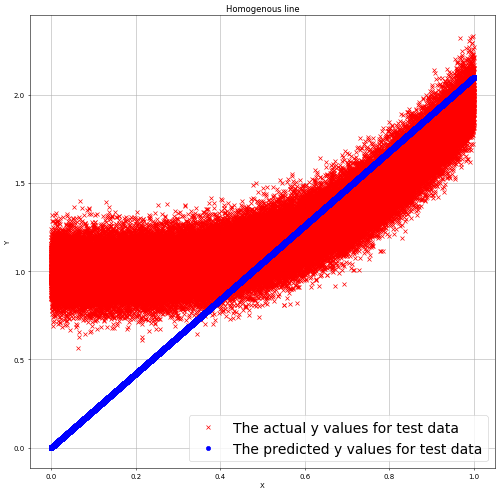

Mean Squarred Error (MSE) of train data:  0.183603685388376
Mean Squarred Error (MSE) of test data:  0.18279800685390143
Optimal W is  [0.8952459  0.80189868]


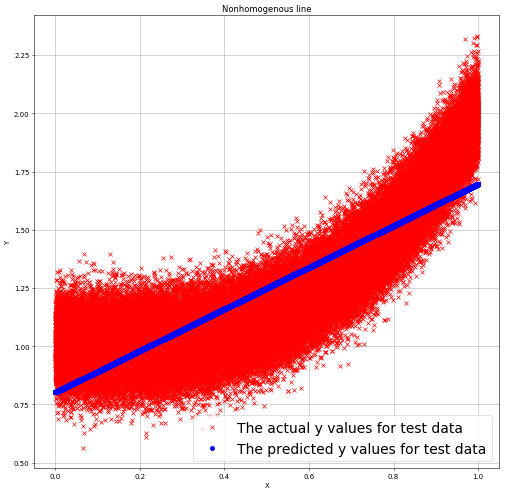

Mean Squarred Error (MSE) of train data:  0.022516995743641962
Mean Squarred Error (MSE) of test data:  0.02287384416673425
Optimal W is  [ 0.05591831 -0.12005114  1.07543366  0.99299729]


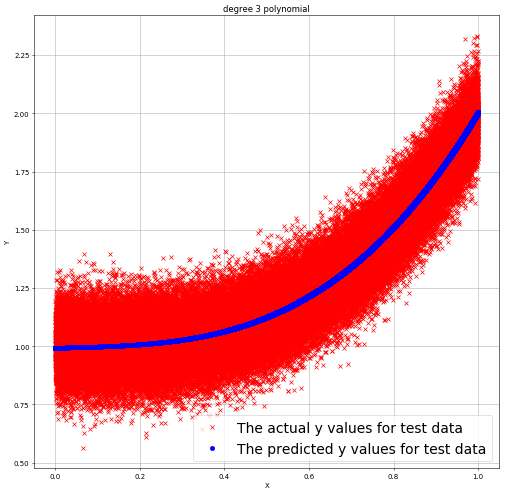

Mean Squarred Error (MSE) of train data:  0.009933055598795166
Mean Squarred Error (MSE) of test data:  0.009992610389047597
Optimal W is  [-0.22951434  1.55224105 -2.70455294  3.6477713  -1.26396556  1.0044276 ]


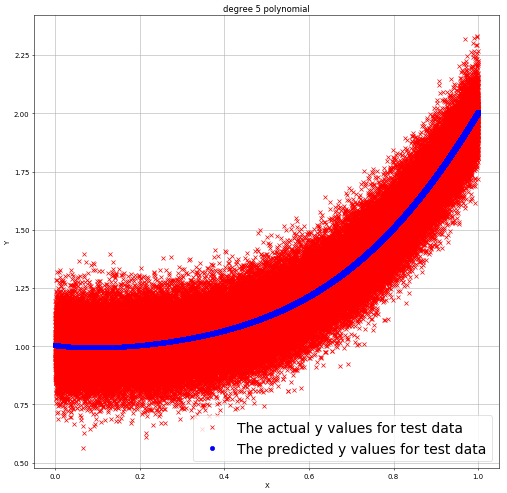

Mean Squarred Error (MSE) of train data:  0.009925242236895315
Mean Squarred Error (MSE) of test data:  0.010001145223347958
Optimal W is  [-0.39059926  0.90534299  0.5361277   0.04662755  1.00265594]


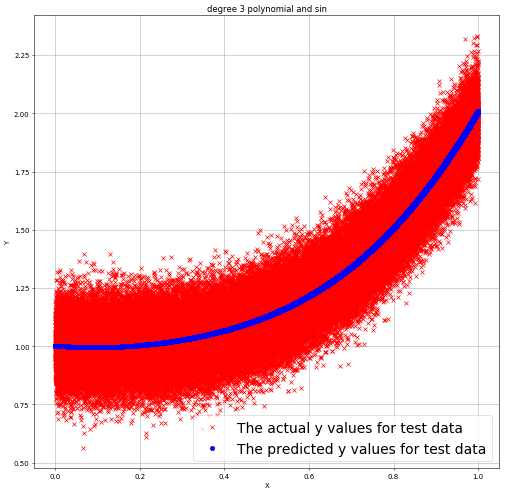

Mean Squarred Error (MSE) of train data:  0.009925388331985162
Mean Squarred Error (MSE) of test data:  0.010000731961580349


In [6]:
# Number of training and test points.
n_train = 3000
n_test = 100000

# This will be used later for regularization. For now it is set to 0.
alpha = 0

# Generating train and test data.
X_train, Y_train = generate_data(n_train)
X_test, Y_test = generate_data(n_test)

# Homogenous line/hyperplane (goes through the origin)
run_ols(X_train, Y_train, X_test, Y_test, alpha, X_train, X_test, "Homogenous line")

# Non-homogenous line/hyperplane
# First we augment the data with an all 1 column/feature
X_augmented_train = np.concatenate((X_train, np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test, np.ones((n_test, 1))), axis=1)

# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "Nonhomogenous line")



X_augmented_train = np.concatenate((X_train, np.power(X_train, 2), np.power(X_train, 3), np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test, np.power(X_test, 2), np.power(X_test, 3), np.ones((n_test, 1))), axis=1)

# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "degree 3 polynomial")



X_augmented_train = np.concatenate((X_train, np.power(X_train, 2), np.power(X_train, 3), np.power(X_train, 4), np.power(X_train, 5), np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test, np.power(X_test, 2), np.power(X_test, 3), np.power(X_test, 4), np.power(X_test, 5), np.ones((n_test, 1))), axis=1)

# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "degree 5 polynomial")



X_augmented_train = np.concatenate((X_train, np.power(X_train, 2), np.power(X_train, 3), np.sin(5*X_train), np.ones((n_train, 1))), axis=1)
X_augmented_test = np.concatenate((X_test, np.power(X_test, 2), np.power(X_test, 3), np.sin(5*X_test), np.ones((n_test, 1))), axis=1)

# Now we run OLS on the augmented data.
run_ols(X_augmented_train, Y_train, X_augmented_test, Y_test, alpha, X_train, X_test, "degree 3 polynomial and sin")

